# Descriptive and Inferential Statistics using Python

This notebook explores the Python implementations (code) of the main techniques and tests in descriptive and inferential statistics. It aims to refresh and revisit the statistical concepts that are relevant for Building AI, it is not a full coverage of statistics. Additional reading is provided where necessary. 

We use a real-world dataset (not benchmark or textbook data), which is likely to be relevant for your workplace activities. It is based on the Social Health Atlas by PHIDU.    

The Public Health Information Development Unit (PHIDU) at Torrens University provides free online access to a Social Health Atlas for Australia, a broad range of health, wellbeing and quality of life determinants by Local Government Area (LGA), Population Health Area, Primary Health Network, and by Indigenous Area of each State.  [PHIDU](https://phidu.torrens.edu.au/)

The primary variable of interest for us is Internet Access at the LGA level and its relationship to the other social health variables in the dataset.


# Installing and importing the libraries

In [1]:
# The following two commands ignore warnings raised due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Libraries for data processing and manipulation
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames
import functools # higher-order functions that work on other functions

# Tools for visualisation
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas.plotting
import seaborn as sns 
from seaborn import regplot

# Common configurations
plt.style.use("ggplot")

<br>

# Reading and structuring the data

We have hosted the dataset on a Google drive, we need to complete the familiar authentication step to download this file. The same file is also available on GitHub.

In [2]:
# Import libraries for reading the data file 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# This is the file ID of the hosted dataset
dataset_file_id = '1vKF02TQfOqu_1eSn0VD01UNtfunyTsOl'

# Download the file from Google Drive
downloaded = drive.CreateFile({'id':dataset_file_id})
# name the downloaded file as  phidu_data.xlsx
downloaded.GetContentFile('phidu_data.xlsx')

In [3]:
data_file = 'phidu_data.xlsx'

# Specifying the sheeet names to get data from
sheet_names = ['Education','Learning or Earning','Internet Access','Family','Housing','Labour Force']

# Reading the data to Pandas dataframes and storing as a list of dataframes
dfs = [pd.read_excel(data_file, sheet) for sheet in sheet_names] 

# Merging the list of dataframes into a single dataframe
df_phidu = functools.reduce(lambda left,right: pd.merge(left,right,on=['Code', 'State', 'Name']),dfs) 

# Replacing irrelevant values of the dataframe to NaN values to ease processing in the later stages
df_phidu.replace({"#": np.nan, '..': np.nan, 'n.a.':np.nan}, inplace=True)

# Data exploration

In [4]:
# find out the dimensionality of the dataframe i.e. (rows, columns) of the merged dataset
df_phidu.shape

(544, 43)

In [5]:
df_phidu.head(3) # display the first n=3 rows of the dataframe

Code                  Name            State Education Quality Indicator  \
0  40070          Adelaide (C)  SOUTH AUSTRALIA                        Good   
1  40120   Adelaide Hills (DC)  SOUTH AUSTRALIA                        Good   
2  43920  Adelaide Plains (DC)  SOUTH AUSTRALIA                        Good   

   Enrolled in higher education  Edu - persons aged 17 years  \
0                           0.0                    34.038462   
1                           0.0                    27.862069   
2                           0.0                    25.404580   

   % in higher education  Learning or Earning at ages 15 to 24  \
0                    0.0                                   0.0   
1                    0.0                                   3.0   
2                    0.0                                   8.0   

   Learning or Earning - People aged 15 to 24  \
0                                         NaN   
1                                        15.0   
2                                        23.0   

   % Learning or Earning at ages 15 to 24  ...  % rental stress  \
0                                     NaN  ...         0.000000   
1                               20.000000  ...         2.281369   
2                               34.782609  ...         1.714286   

   % Low income households under financial stress from mortgage or rent  \
0                                           0.000000                      
1                                           2.168022                      
2                                           1.654412                      

   % Low income households  % persons living in crowded dwellings  \
0                25.581395                               1.739130   
1                76.503110                              79.167635   
2                63.700234                              62.114268   

   % Aboriginal persons living in crowded dwellings  Unemployed  Labour force  \
0                                          0.000000         3.0         121.0   
1                                         83.778107         4.0         133.0   
2                                         69.655172         5.0         160.0   

   % unemployed  % labour force participation  \
0      2.479339                     85.211268   
1      3.007519                     62.735849   
2      3.125000                     78.817734   

   % female labour force participation  
0                            27.272727  
1                            52.941176  
2                            42.500000  

[3 rows x 43 columns]

In [6]:
# view the data type of each attribute along with the non-null count (non-null - how many cells have a value, null - blank cells)
df_phidu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 43 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Code                                                                                         544 non-null    int64  
 1   Name                                                                                         544 non-null    object 
 2   State                                                                                        544 non-null    object 
 3   Education Quality Indicator                                                                  544 non-null    object 
 4   Enrolled in higher education                                                                 365 non-null    float64
 5   Edu - persons aged 17 years         

# Descriptive statistics

***Descriptive statistics*** methods are used to summarise data into statistics that describe the sample and/or the population from which the sample is derived.
From an AI perspective, descriptive stats is the first step to understanding which dataset/variables will be useful in representing a given problem within an AI model. 

The three types of descriptive statistics:
1. measures of central tendency (mean, median, mode)
2. measures of dispersion (range, standard deviation, variance)
3. measures of position (percentiles, quartiles, interquartile range)

## Describe() function

In [7]:
# Too easy with Pandas.describe() function, which calculates central tendency, dispersion and shape, by default for all numerical attributes 
# which means the second and third attributes are excluded. 
df_phidu.describe()

Code  Enrolled in higher education  \
count    544.000000                    365.000000   
mean   37502.582721                    170.441096   
std    17983.340115                    445.900854   
min    10050.000000                      0.000000   
25%    20890.000000                      7.000000   
50%    36545.000000                     28.000000   
75%    53465.000000                    143.000000   
max    89399.000000                   6519.000000   

       Edu - persons aged 17 years  % in higher education  \
count                   365.000000             365.000000   
mean                    603.452207              18.796407   
std                    1158.604682              17.209391   
min                       0.000000               0.000000   
25%                      60.720307               7.044242   
50%                     212.357895              15.817670   
75%                     600.953131              23.918516   
max                   13301.186481             125.000000   

       Learning or Earning at ages 15 to 24  \
count                            543.000000   
mean                            4287.992634   
std                             7641.278507   
min                                0.000000   
25%                              208.000000   
50%                              988.000000   
75%                             4389.000000   
max                            59817.000000   

       Learning or Earning - People aged 15 to 24  \
count                                  535.000000   
mean                                  5165.788785   
std                                   9008.879949   
min                                     15.000000   
25%                                    316.500000   
50%                                   1312.000000   
75%                                   5338.500000   
max                                  71407.000000   

       % Learning or Earning at ages 15 to 24  \
count                              535.000000   
mean                                77.247131   
std                                 13.843392   
min                                 20.000000   
25%                                 74.787165   
50%                                 80.701754   
75%                                 85.163347   
max                                105.555556   

       Internet accessed from private dwelling  Total private dwellings  \
count                               542.000000               542.000000   
mean                              12714.079336             15285.446494   
std                               24827.870150             28784.320286   
min                                   3.000000                36.000000   
25%                                 684.250000               999.500000   
50%                                3461.500000              4690.500000   
75%                               13100.750000             16213.750000   
max                              355642.000000            404159.000000   

       % private dwellings where Internet accessed  ...  % rental stress  \
count                                   542.000000  ...       542.000000   
mean                                     75.903089  ...        23.498210   
std                                      10.260480  ...         9.992309   
min                                       7.894737  ...         0.000000   
25%                                      71.885280  ...        16.147867   
50%                                      76.928886  ...        25.268289   
75%                                      82.492152  ...        31.127834   
max                                      93.168325  ...        44.452387   

       % Low income households under financial stress from mortgage or rent  \
count                                         542.000000                      
mean                                           20.268098                      
std                                          

In [8]:
# We can select categorical attributes only using the iloc[] operator, but if any numerical attributes are included then it reverts to the numerical default.
df_phidu.iloc[:,1:4].describe() 
# Here, top is the most frequent occurring and freq is the number of occurrences. 

Name              State Education Quality Indicator
count                544                544                         544
unique               543                  8                           3
top     Campbelltown (C)  WESTERN AUSTRALIA                        Good
freq                   2                137                         360

## Measures of Central Tendency
 

1.   Mean - or average, add up all the values and divide by the number of values.
2.   Median - the midpoint of the ordered set. To find the median, list your data points in ascending order and select the number in the middle.
3. Mode - the most common number in the data.

In [9]:
# Import the built-in stats library
import statistics 
from statistics import StatisticsError
# Import stats library in scipy
from scipy import stats 

# Computing the mean, median, mode values of the % private dwellings where internet was accessed
# here we are using list() to convert the dataframe column to a list
# round() to round off the given number of digits and returns the floating-point number according to the specified number of digits
# dropna() to drop missing observations

mean_internetNotAccessed = round(statistics.mean(list(df_phidu['Internet not accessed from private dwelling'].dropna())), 2)
median_internetNotAccessed = round(statistics.median(list(df_phidu['Internet not accessed from private dwelling'].dropna())), 2)
mode_internetNotAccessed = round(statistics.mode(list(df_phidu['Internet not accessed from private dwelling'].dropna())),2)

# Print the results in a table format using PrettyTable()
pretty_table = PrettyTable()
pretty_table.field_names = ["variable name", "mean", "median","mode"]
pretty_table.add_row(["Internet not accessed from private dwelling",mean_internetNotAccessed,median_internetNotAccessed,mode_internetNotAccessed])
print(pretty_table)

+---------------------------------------------+---------+--------+------+
|                variable name                |   mean  | median | mode |
+---------------------------------------------+---------+--------+------+
| Internet not accessed from private dwelling | 2162.57 | 921.0  | 39.0 |
+---------------------------------------------+---------+--------+------+


Measures of central tendency can be visualised using a boxplot and histogram. Notice how we are using the Pandas library to compute the measures (earlier we used the statistics library). 

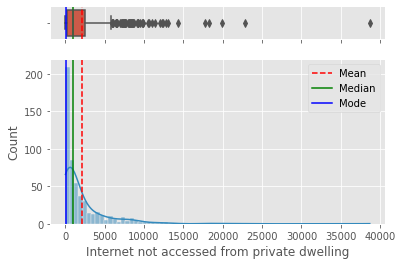

In [10]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
# calculating the mean, median and mode values of 'Internet not accessed from private dwelling'
mean=df_phidu['Internet not accessed from private dwelling'].dropna().mean()
median=df_phidu['Internet not accessed from private dwelling'].dropna().median()
mode=df_phidu['Internet not accessed from private dwelling'].dropna().mode().values[0]

# plot the box plot 
sns.boxplot(data=df_phidu, x="Internet not accessed from private dwelling", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# plot the histogram
sns.histplot(data=df_phidu, x="Internet not accessed from private dwelling", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean") # plot the mean line 
ax_hist.axvline(median, color='g', linestyle='-', label="Median") # plot the median line
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode") # plot the mode line

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Let's try a variable that is not heavily skewed, '% Learning or Earning at ages 15 to 24'

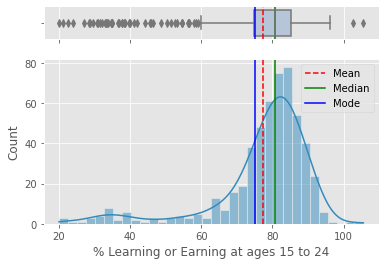

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
# calculating the mean, median and mode values of the learning or earning %s from ages 15 to 24
mean=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().mean()
median=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().median()
mode=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().mode().values[0]

# plot the box plot
sns.boxplot(data=df_phidu, x="% Learning or Earning at ages 15 to 24", ax=ax_box, color="lightsteelblue")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# plot the histogram
sns.histplot(data=df_phidu, x="% Learning or Earning at ages 15 to 24", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean") # plot the mean line 
ax_hist.axvline(median, color='g', linestyle='-', label="Median") # plot the median line
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode") # plot the mode line

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Visualising Central Tendency

> ***Normal Distribution:*** a symmetric distribution in which the mean, mode and median are equal. 68% of the data lies within one standard deviation
of the mean, and 95% lies within two standard deviations. 

> Real life data is generally not normally distributed.

> ***Left Skewed Distribution:*** a symmetric distribution that has a long tail pointing to the left. This means most of the data is concentrated to the right side of the distribution. *% Learning or Earning at ages 15 to 24* is an example of a left skewed distribution meaning that most observations have a high concentration of learning or earning percentages.

> ***Right Skewed Distribution:*** has a long tail pointing to the right. This means most of the data is concentrated to the left side of the distribution. The *Internet not accessed from private dwelling* is in this case right-skewed which tells us there are less 'Internet not accessed from private dwelling' in Australia.

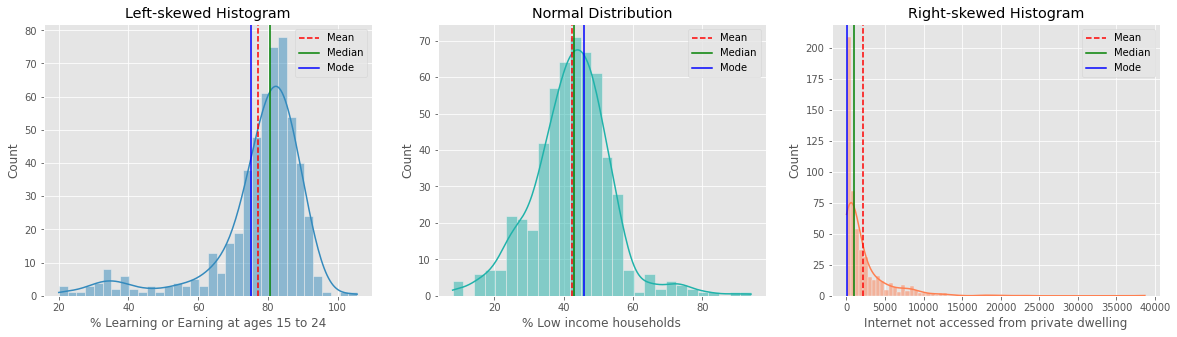

In [12]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Left-skewed distribution 
mean1=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().mean()
median1=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().median()
mode1=df_phidu['% Learning or Earning at ages 15 to 24'].dropna().mode().values[0]
sns.histplot(data=df_phidu, x="% Learning or Earning at ages 15 to 24", ax=ax1, kde=True)
ax1.axvline(mean1, color='r', linestyle='--', label="Mean")
ax1.axvline(median1, color='g', linestyle='-', label="Median")
ax1.axvline(mode1, color='b', linestyle='-', label="Mode")
ax1.legend()
ax1.set(xlabel='% Learning or Earning at ages 15 to 24', title='Left-skewed Histogram')

# Normal distribution 
mean2=df_phidu["% Low income households"].dropna().mean()
median2=df_phidu["% Low income households"].dropna().median()
mode2=df_phidu["% Low income households"].dropna().mode().values[0]
sns.histplot(data=df_phidu, x="% Low income households", ax=ax2, kde=True, color='lightseagreen')
ax2.axvline(mean2, color='r', linestyle='--', label="Mean")
ax2.axvline(median2, color='g', linestyle='-', label="Median")
ax2.axvline(mode2, color='b', linestyle='-', label="Mode")
ax2.legend()
ax2.set(xlabel="% Low income households", title='Normal Distribution')

# Right-skewed distribution
mean3=df_phidu["Internet not accessed from private dwelling"].dropna().mean()
median3=df_phidu["Internet not accessed from private dwelling"].dropna().median()
mode3=df_phidu["Internet not accessed from private dwelling"].dropna().mode().values[0]
sns.histplot(data=df_phidu, x="Internet not accessed from private dwelling", ax=ax3, kde=True, color='coral')
ax3.axvline(mean3, color='r', linestyle='--', label="Mean")
ax3.axvline(median3, color='g', linestyle='-', label="Median")
ax3.axvline(mode3, color='b', linestyle='-', label="Mode")
ax3.legend()
ax3.set(xlabel="Internet not accessed from private dwelling", title='Right-skewed Histogram')
plt.show()

<br>

## Measures of Dispersion

Used to compute the spread of the values around the mean and other measures of central tendency. 

1. Standard Deviation (SD or $σ$) - measures dispersion relative to its mean. It is the square root of variance. When the data is more dispersed the Standard Deviation is higher and vice versa. 
2. Variance - similar to the Standard Deviation, as it is the same value squared, $v=σ^2$, where $σ$ is the standard deviation.
3. Range - the difference between the largest and the smallest values of a variable. 

In [13]:
# Computing the standard deviation, variance, range of the private dwellings which has internet access

# here we are using list() to convert the dataframe column to a list
# round() to round up to the number provided as the first parameter to the number of decimal points given as the second parameter
# dropna() to drop missing/blank values 
# statistics.stdev() to calculate the standard deviation
# statistics.variance() to calculate the variance
# max() to extract the maximum value
# min() to extract the minimum value

variance_internetNotAccessed = round(statistics.variance(list(df_phidu['Internet not accessed from private dwelling'].dropna())),2)
stdev_internetNotAccessed = round(statistics.stdev(list(df_phidu['Internet not accessed from private dwelling'].dropna())),2)
max_internetNotAccessed = round(df_phidu['Internet not accessed from private dwelling'].dropna().max(),2)
min_internetNotAccessed = round(df_phidu['Internet not accessed from private dwelling'].dropna().min(),2)
range_internetNotAccessed = round(df_phidu['Internet not accessed from private dwelling'].dropna().max() - df_phidu['Internet not accessed from private dwelling'].dropna().min(),2)

# Print the results in a table format using PrettyTable()
pretty_table = PrettyTable()
pretty_table.field_names = ["variable name","variance","standard deviation","max","min","range"]
pretty_table.add_row(["Internet not accessed from private dwelling",variance_internetNotAccessed,stdev_internetNotAccessed,max_internetNotAccessed,min_internetNotAccessed,range_internetNotAccessed])
print(pretty_table)

+---------------------------------------------+-------------+--------------------+---------+-----+---------+
|                variable name                |   variance  | standard deviation |   max   | min |  range  |
+---------------------------------------------+-------------+--------------------+---------+-----+---------+
| Internet not accessed from private dwelling | 11595227.34 |      3405.18       | 38683.0 | 8.0 | 38675.0 |
+---------------------------------------------+-------------+--------------------+---------+-----+---------+


## Measures of Position


***Quartiles*** 
 Separates an ordered data series into four equal parts, or quarters. An extension of this is percentile - a score below which a given percentage of scores exist. 

> 1st Quartile ($Q1$)- the first quarter in ascending order, 25% of the data falls below this point.
>> 
> 2nd Quartile ($Q2$) - the median or midpoint, the second quarter in ascending order, 50% of the data falls below this point.  
>> 
> 3rd Quartile ($Q3$) - the third quarter in ascending order, 75% of the data falls below this point.
>> 
> 4th Quartile ($Q4$)  is the maximum/largest number in the dataset.  
>> 
> Interquartile Range $(IQR)$ - the mid-spread of the ordered dataset, subtract Q1 from Q3. This is where most of the data lies.  $IQR = (Q1$ − $Q3)$.

In [14]:
# calculate the quartiles and the interquartile range 
# here we are using quantile() to calculate the quantiles
# stats.iqr() to calculate the interquartile range

q1 = round(df_phidu['Internet not accessed from private dwelling'].quantile(0.25), 2) # first quartile
q2 = round(df_phidu['Internet not accessed from private dwelling'].quantile(0.5), 2) # second quartile/median
q3 = round(df_phidu['Internet not accessed from private dwelling'].quantile(0.75), 2) # third quartile
q4 = round(df_phidu['Internet not accessed from private dwelling'].quantile(1), 2) # fourth quartile
iqr = round(stats.iqr(list(df_phidu['Internet not accessed from private dwelling'].dropna())),2) # interquartile range

# Print the results in a table format using PrettyTable()
pretty_table = PrettyTable()
pretty_table.field_names = ["variable name","Q1","Q2","Q3","Q4","IQR"]
pretty_table.add_row(["Internet not accessed from private dwelling",q1,q2,q3,q4,iqr])
print(pretty_table)

+---------------------------------------------+--------+-------+--------+---------+---------+
|                variable name                |   Q1   |   Q2  |   Q3   |    Q4   |   IQR   |
+---------------------------------------------+--------+-------+--------+---------+---------+
| Internet not accessed from private dwelling | 252.25 | 921.0 | 2480.0 | 38683.0 | 2227.75 |
+---------------------------------------------+--------+-------+--------+---------+---------+


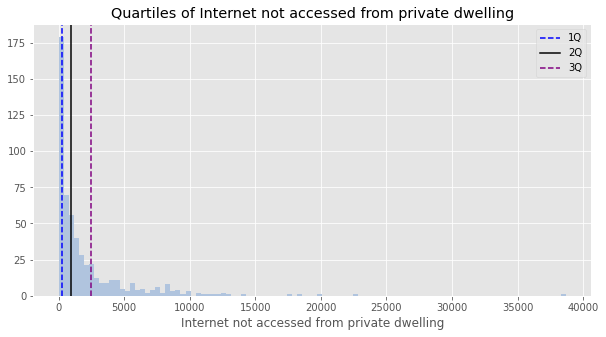

In [15]:
# Visualize the interquartile ranges for Internet not accessed from private dwelling
plt.figure(figsize=(10,5))
plt.hist(df_phidu['Internet not accessed from private dwelling'], bins=100, color='lightsteelblue')
# Vertical lines for each percentile of interest
plt.axvline(df_phidu['Internet not accessed from private dwelling'].quantile(0.25), color='b', linestyle='--', label='1Q')
plt.axvline(df_phidu['Internet not accessed from private dwelling'].quantile(0.50), color='k', label='2Q')
plt.axvline(df_phidu['Internet not accessed from private dwelling'].quantile(0.75), linestyle='--', color='purple', label='3Q')
plt.legend()
plt.title("Quartiles of Internet not accessed from private dwelling")
plt.xlabel("Internet not accessed from private dwelling")
plt.show()

***Box Plots*** is an intuitive way of graphically depicting groups of numerical data through their quartiles, and also can be used to visualize and detect outliers. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. 



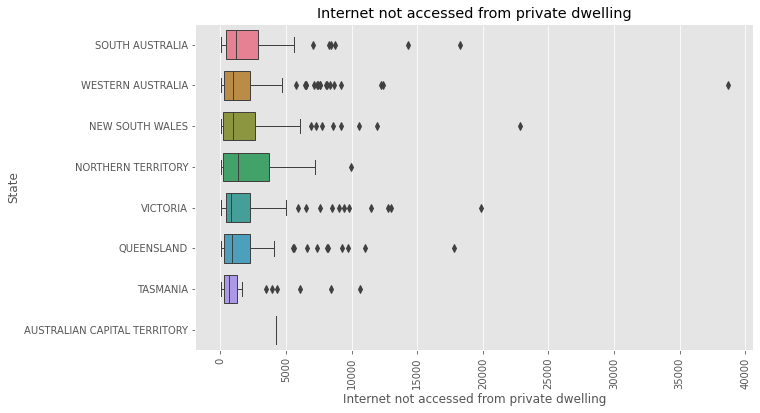

In [16]:
# use a boxplot to visualise the unemployed % by state
plt.figure(figsize=(10,6))
s = sns.boxplot(x="Internet not accessed from private dwelling", y="State", data=df_phidu, width=0.7, linewidth=1, orient="h", palette="husl")
plt.xticks(rotation='vertical')
plt.title('Internet not accessed from private dwelling')
plt.show()

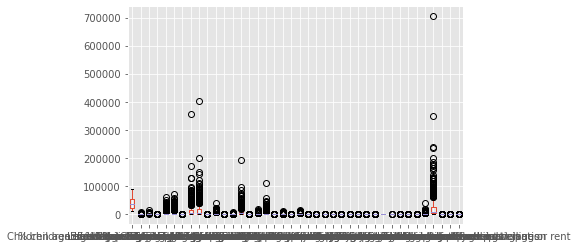

In [17]:
# Pandas dataframe also has an inbuilt boxplot function
# for all attributes
df_phidu.boxplot()

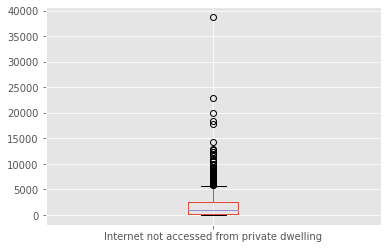

In [18]:
# for selected attributes
df_phidu.boxplot(column=['Internet not accessed from private dwelling'])

# Other data visualisations




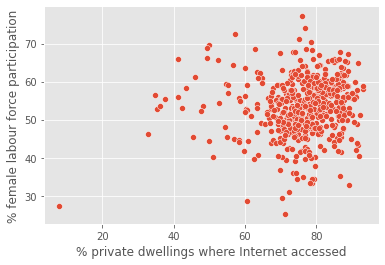

In [19]:
# a scatter plot to visualise % of private dwellings where internet accessed and % of female labour force participation.
sns.scatterplot(x='% private dwellings where Internet accessed', y='% female labour force participation', palette='Paired',data=df_phidu)

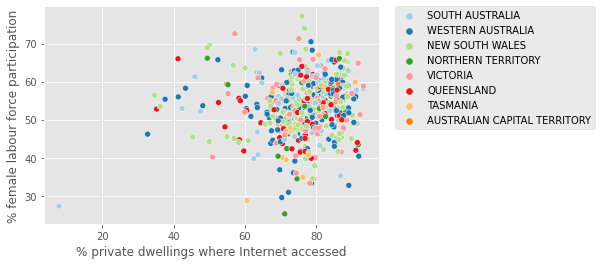

In [20]:
# the same scatter plot with state as a legend'.
sns.scatterplot(x='% private dwellings where Internet accessed', y='% female labour force participation', palette='Paired',data=df_phidu, hue='State', )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

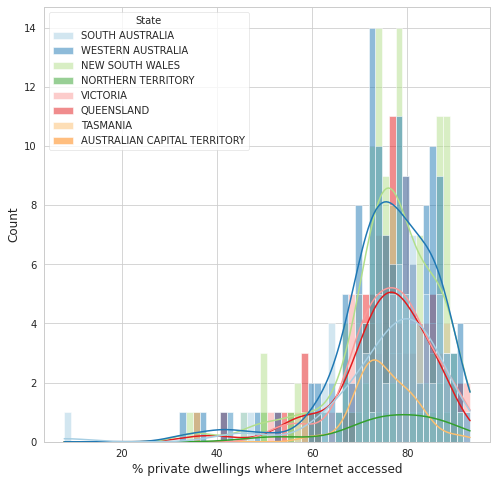

In [21]:
# histograms to represent the % of private dwellings with internet access by State
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.histplot(data=df_phidu, x='% private dwellings where Internet accessed', hue='State', palette='Paired', bins=60, kde=True)

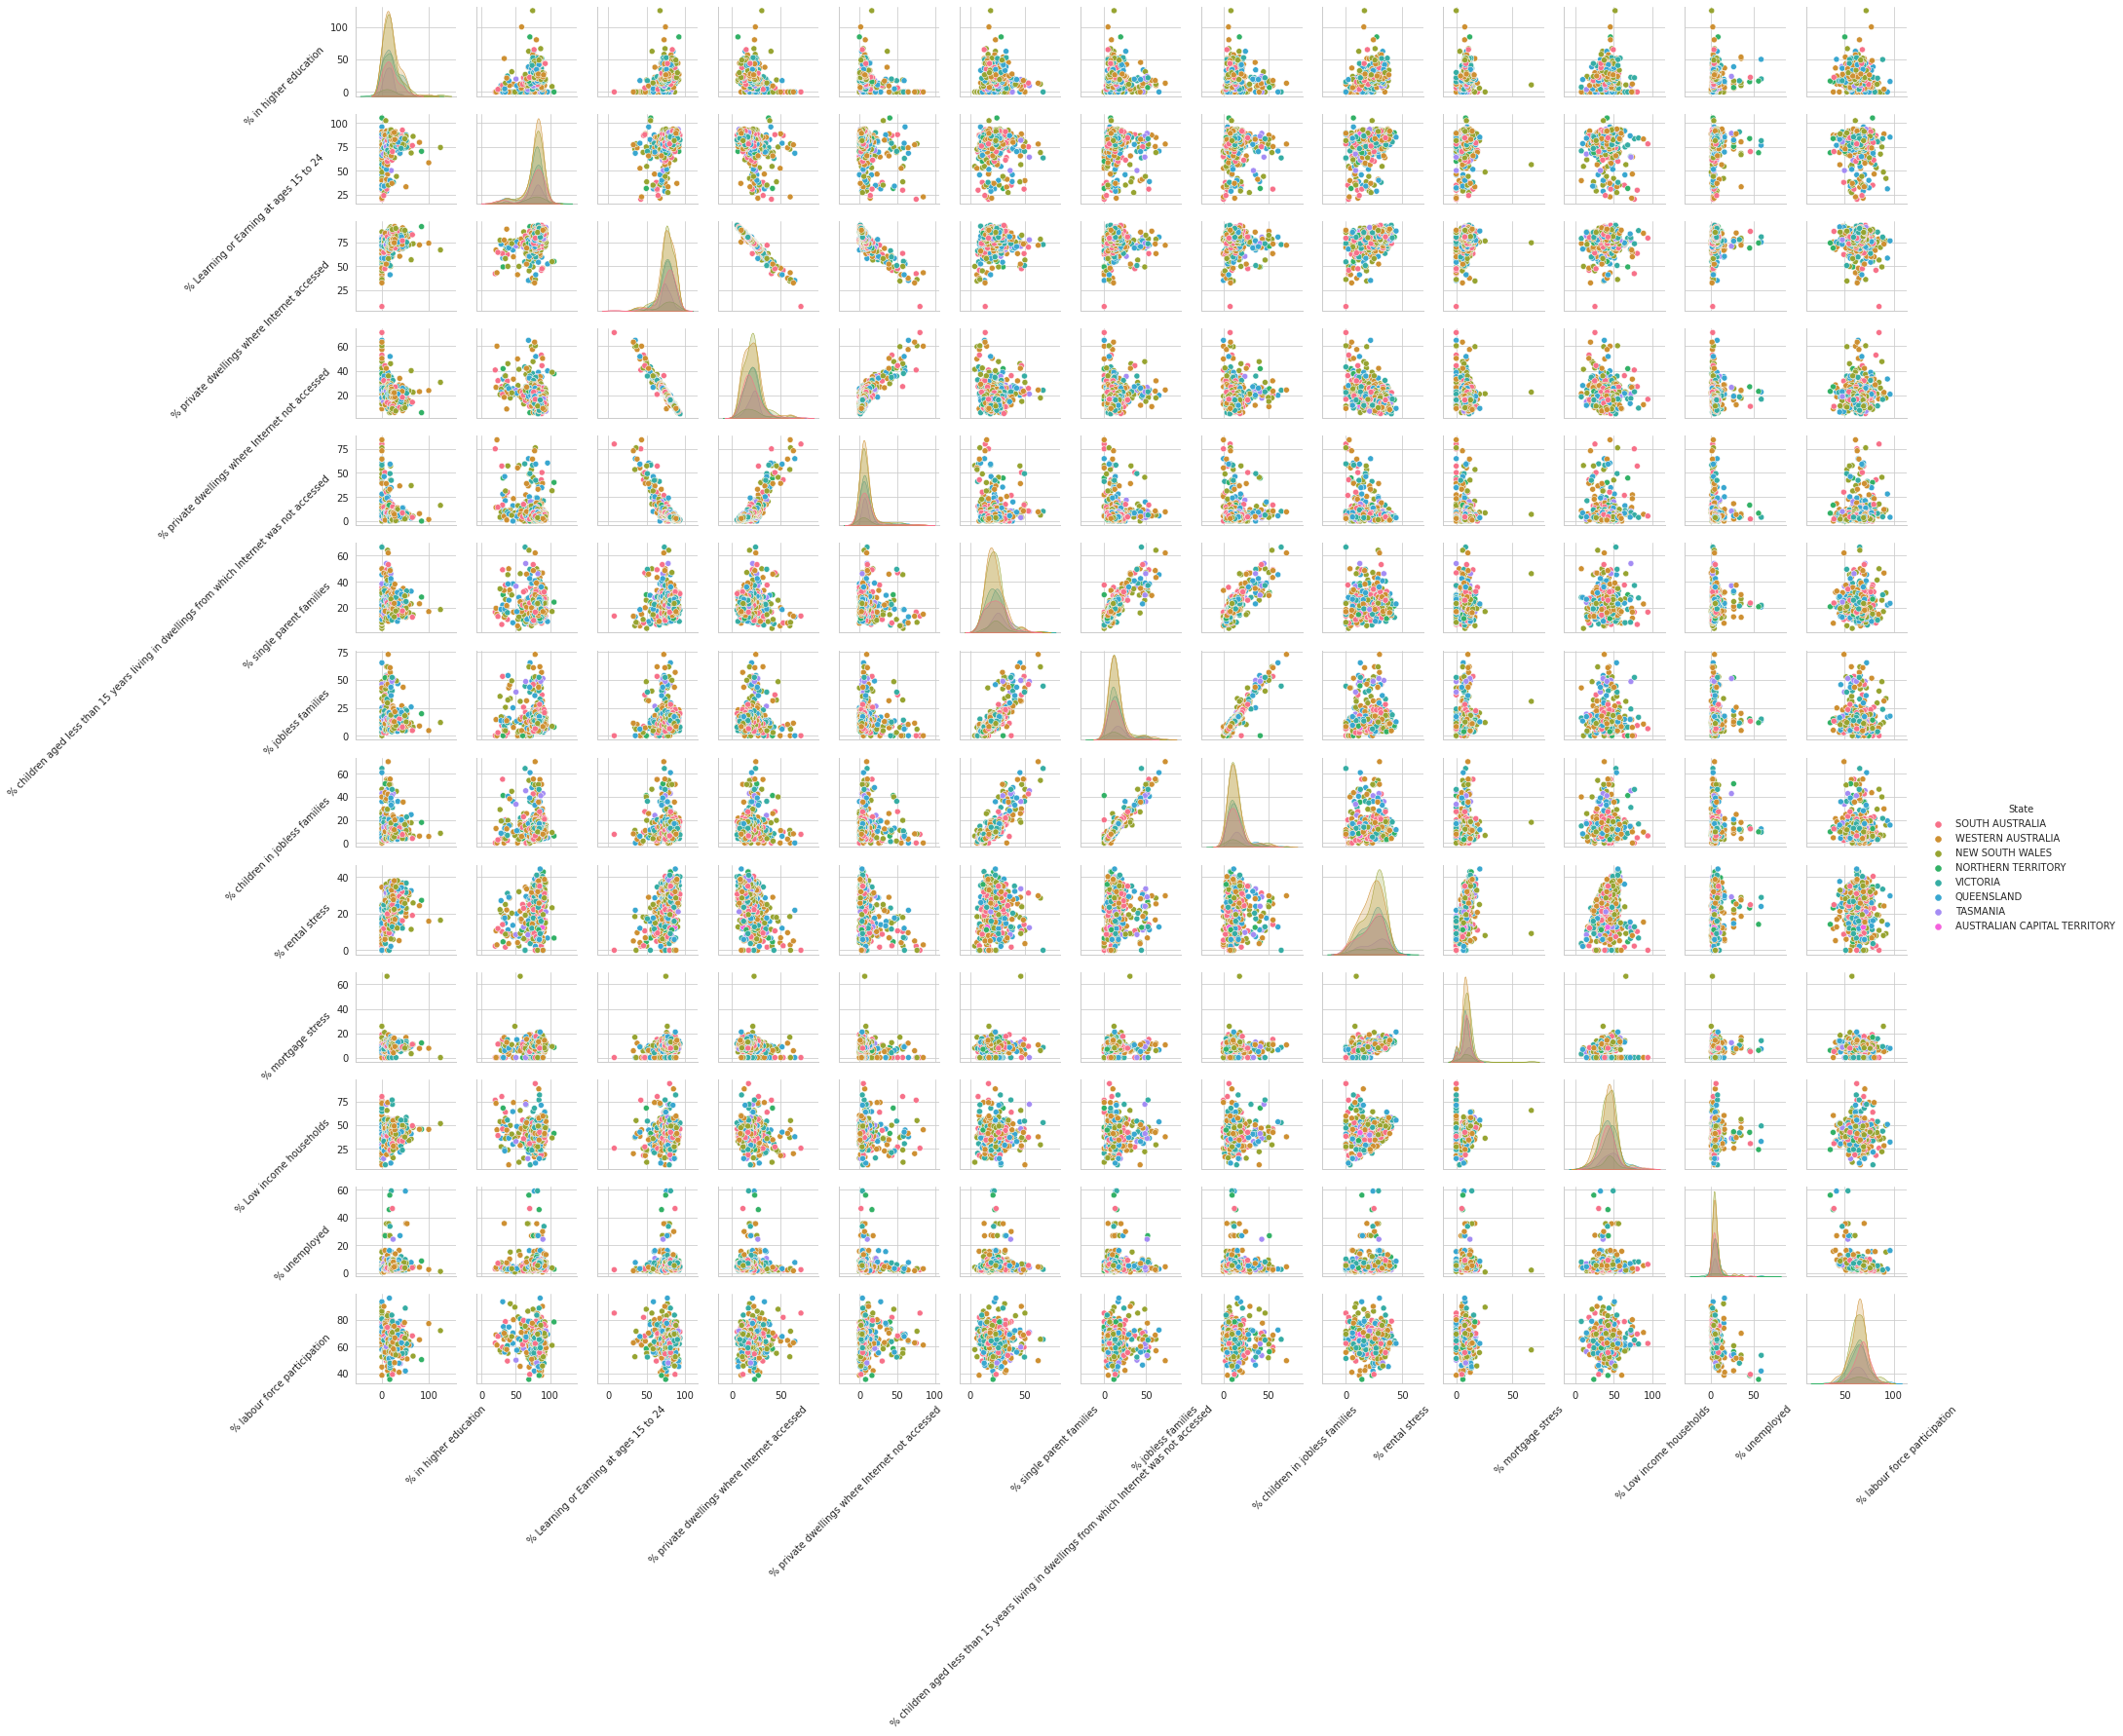

In [22]:
# here we use pairplot() to plot pairwise relationships among the chosen variables from the dataset
df_pairplot = df_phidu[['State','% in higher education','% Learning or Earning at ages 15 to 24','% private dwellings where Internet accessed',
                     '% private dwellings where Internet not accessed','% children aged less than 15 years living in dwellings from which Internet was not accessed',
                     '% single parent families','% jobless families','% children in jobless families','% rental stress','% mortgage stress','% Low income households',
                     '% unemployed','% labour force participation']]

g = sns.pairplot(data=df_pairplot, hue='State', height=2)
fontdict={'fontsize': 10}
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontdict=fontdict) # rotate x axis labels
    ax.xaxis.get_label().set_horizontalalignment('left') # set x labels alignment
    ax.set_ylabel(ax.get_ylabel(), rotation = 45, fontdict=fontdict) # rotate y axis labels
    ax.yaxis.get_label().set_horizontalalignment('right') # set y labels alignment

# Inferential statistics

Inferential statistics are used to "test" if there is a statistically significant relationship between one or more variables. These are formulated in the style of hypothesis tests, and evaluated using the p-value ([Reference](https://www.stat.berkeley.edu/~spector/s133/Random1a.html)) 

In this section let's work through the following four major inferential statistical tests: 

1. T-Test
2. ANOVA
3. Chi-Squared Test
4. Regression 

## t-test 

The t-test is used to determine whether the means of two groups are equal to each other. The assumption for the test is that both groups are sampled from normal distributions with equal variances. The null hypothesis is that the two means are equal, and the alternative is that they are not. ([Reference](https://statistics.berkeley.edu/computing/r-t-tests))

#### *t-test - example 1*

Let's use t-test to examine if there is a difference between the mean percentage of dwellings which has access to internet in NSW and WA. 

In order to check the differences between the internet access percentages, we will conduct a Two-Sample T-Test. ***Two-Sample T-Test*** compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

The hypothesis test can be described as follows,

> ***Null Hypothesis*** $(H_{0})$: There is no difference in internet access in the states of NSW and WA. $H_{NSW}−H_{WA}  = 0$

> ***Alternative Hypothesis*** $(H_{A})$: There is a difference in internet access in the states of  NSW and WA. $H_{NSW}−H_{WA} ≠ 0$

In [23]:
# Import libraries
from scipy.stats import ttest_ind # In this example we are using the scipy library to calculate the t-test

# Extract the % of internet access for private dwellings for New South Wales and Western Australia to two lists
nsw_df = df_phidu.loc[df_phidu['State'] == 'NEW SOUTH WALES']
nsw_internet = list(nsw_df['% private dwellings where Internet accessed'].dropna())
wa_df = df_phidu.loc[df_phidu['State'] == 'WESTERN AUSTRALIA']
wa_internet = list(wa_df['% private dwellings where Internet accessed'].dropna())

# Calculate the respective mean %s of internet access for private dwellings for the respective states
print("Mean internet access in NSW",'\t',': ',round(np.mean(nsw_internet), 2))
print("Mean internet access in WA",'\t',': ',round(np.mean(wa_internet),2),'\n')

# Calculating the p-values and rejecting or not rejecting the null hypothesis
ttest,pval = ttest_ind(nsw_internet,wa_internet)
print()
print("p-value: ",pval)
if pval <0.05:
  print("We reject the null hypothesis")
else:
  print("We do not reject the null hypothesis")

Mean internet access in NSW 	 :  75.98
Mean internet access in WA 	 :  75.97 


p-value:  0.9968178638235399
We do not reject the null hypothesis


In the next example we will be using a different library *bioinfokit* to carry out the t-test which gives a more descriptive output in comparison to scipy library. 

#### *t-test - example 2*

Explore if there exist a significant difference between the percentage of dwellings which has access to internet in the two states NSW and NT. 

> ***Null Hypothesis*** $(H0)$: There is no difference between internet access % in the states of NSW and NT. $Hnsw−Hnt = 0$

> ***Alternative Hypothesis*** $(HA)$: There is a difference between the internet access % in the states of  NSW and NT. $Hnsw−Hnt ≠ 0$

In [24]:
# Installing and importing library
# The bioinfokit library is not available by default so we have to install it first.
!pip install bioinfokit
from bioinfokit.analys import stat # In this example we are using the bioinfokit library to calculate the t-test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=b3f1b800fa9a999c5bf520f4369d08099015246981b62f680dbe48dbee52adb4
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=67c78f7b436b41f9467c08d91d83c3e9d01c2f08ce336aceef6e6a70160d99e4
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [25]:
df_nsw_nt = df_phidu[['State', "% private dwellings where Internet accessed"]]
df_nsw_nt = df_nsw_nt[(df_nsw_nt["State"] == 'NEW SOUTH WALES') | (df_nsw_nt["State"] == 'NORTHERN TERRITORY')]

res = stat() # Perform two sample t-test using bioinfokit
## for unequal variance t-test (Welch's t-test) set evar=False ##
res.ttest(df=df_nsw_nt, xfac="State", res="% private dwellings where Internet accessed", test_type=2, evar=False)
print(res.summary)


Two sample t-test with unequal variance (Welch's t-test)

------------------  ---------
Mean diff           -0.667218
t                   -0.242724
Std Error            2.74888
df                  21.4454
P-value (one-tail)   0.405263
P-value (two-tail)   0.810526
Lower 95.0%         -6.3766
Upper 95.0%          5.04217
------------------  ---------

Parameter estimates

Level                 Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
------------------  --------  -------  ---------  -----------  -------------  -------------
NEW SOUTH WALES          130  75.9795    10.4215     0.914029        74.1711        77.7879
NORTHERN TERRITORY        18  76.6467    10.9989     2.59247         71.1771        82.1164



As the p-value > 0.05 we are not rejecting the null hypothesis, which means  that there is no statistically significant difference between the '% private dwellings where Internet accessed' of the two states.

## ANOVA

*A two-way ANOVA is used to determine a statistically significant difference between the means of three or more independent groups that have been split on two factors.* 

More information regarding ANOVA tests can be found here ([Reference](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/)).

In [26]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# Renaming the columns for easy reference
df_phidu = df_phidu.rename(columns={'% private dwellings where Internet accessed': 'internet_access_percentage',
                                    'Enrolled in higher education': 'enrolled_in_higher_education',
                                    'Education Quality Indicator': 'education_quality_indicator'})

In [28]:
# Perform two-way ANOVA
model = ols('enrolled_in_higher_education ~ C(education_quality_indicator) + C(State) + C(education_quality_indicator):C(State)', data=df_phidu).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 12
  'rank is %d' % (J, J_), ValueWarning)


sum_sq     df             F  \
C(education_quality_indicator)           7.743646e-08    2.0  1.907557e-13   
C(State)                                 3.352755e+06    7.0  2.359749e+00   
C(education_quality_indicator):C(State)  1.510883e+06   14.0  5.316976e-01   
Residual                                 7.043159e+07  347.0           NaN   

                                           PR(>F)  
C(education_quality_indicator)           1.000000  
C(State)                                 0.039872  
C(education_quality_indicator):C(State)  0.893845  
Residual                                      NaN

Interpreting the above results, we can conclude that the variable *State* has a statistically significant effect on the number enrolled in higher education as the two p-value is less than 0.05 (0.039). However, categorical variable *Education Quality Indicator* has no significant impact in determining the number enrolled in higher education as the p-value is 1.0

Moreover, since the p-value for the interaction effect between the above two variables (0.89) is not less than 0.05, tells us that there is no significant interaction effect between *Education Quality Indicator* and *State* in relation to the number enrolled in higher education.

## Chi Square Test



The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. 

*The Chi-square test is intended to test how likely it is that an observed distribution is due to chance. It is also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent.* ([Reference](https://www.ling.upenn.edu/~clight/chisquared.htm))

In [29]:
# Import library 
from scipy.stats import chi2_contingency

> ***Null Hypothesis*** $(H0)$: Quality of Education is independent of State.

> ***Alternative Hypothesis*** $(HA)$: Quality of Education is not independent of State.

In [30]:
# Get table of observed counts - contingency table
contingency_table = pd.crosstab(df_phidu['education_quality_indicator'], df_phidu['State'])
contingency_table

State                        AUSTRALIAN CAPITAL TERRITORY  NEW SOUTH WALES  \
education_quality_indicator                                                  
Acceptable                                              0               15   
Good                                                    1              100   
Poor                                                    0               15   

State                        NORTHERN TERRITORY  QUEENSLAND  SOUTH AUSTRALIA  \
education_quality_indicator                                                    
Acceptable                                    3           1                7   
Good                                          8          49               44   
Poor                                          7          28               20   

State                        TASMANIA  VICTORIA  WESTERN AUSTRALIA  
education_quality_indicator                                         
Acceptable                          0         1                  7  
Good                               29        76                 53  
Poor                                0         3                 77

Please note that for this test to be effective, at least five observations are required in each cell of the contingency table, but we will use this as a demonstration.

In [31]:
c, p, dof, expected = chi2_contingency(contingency_table) # Chi-square test of independence
print('p-value:', p)

p-value: 1.0964044055339297e-21


As p < 0.05, we reject the null hypothesis, which then implies that there is a dependency between the two variables.

## Regression

We’ll now take a look at the appropriate type of test to use when you have a quantitative explanatory variable and a quantitative response variable and if there exist a linear relationship between the two variables *% Learning or Earning at ages 15 to 24* and *% internet accessing dwellings*

In [32]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
# create a dataframe with the two columns, internet_access_percentage and % Learning or Earning at ages 15 to 24
df_regression = df_phidu[['internet_access_percentage', '% Learning or Earning at ages 15 to 24']].dropna()

In [34]:
Y = list(df_regression['internet_access_percentage'])
X = list(df_regression['% Learning or Earning at ages 15 to 24'])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     70.88
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.54e-16
Time:                        02:57:07   Log-Likelihood:                -1946.3
No. Observations:                 534   AIC:                             3897.
Df Residuals:                     532   BIC:                             3905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1894      2.276     25.125      0.0

In [35]:
# extract the p-values
print('p-values')
print('--------')
results.summary2().tables[1]['P>|t|']

p-values
--------


const    1.955591e-92
x1       3.540343e-16
Name: P>|t|, dtype: float64

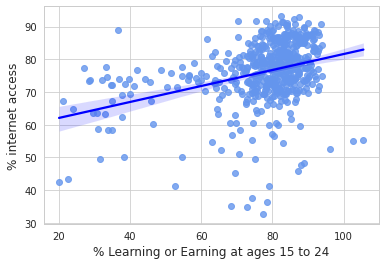

In [36]:
# visualizing the two variables with the regression line
sns.set_style('whitegrid')
regplot(x=df_regression['% Learning or Earning at ages 15 to 24'], y=Y, fit_reg=True, data=df_regression, color='cornflowerblue', line_kws={"color": "blue"})
plt.xlabel('% Learning or Earning at ages 15 to 24')
plt.ylabel('% internet access')
plt.show()

The P < 0.05 for regression, the scatterplot and the regression line all  indicate that there is a positive linear relationship between "% internet access" and "% Learning or Earning at ages 15 to 24". 

# Exploratory analysis

## Correlation Matrix

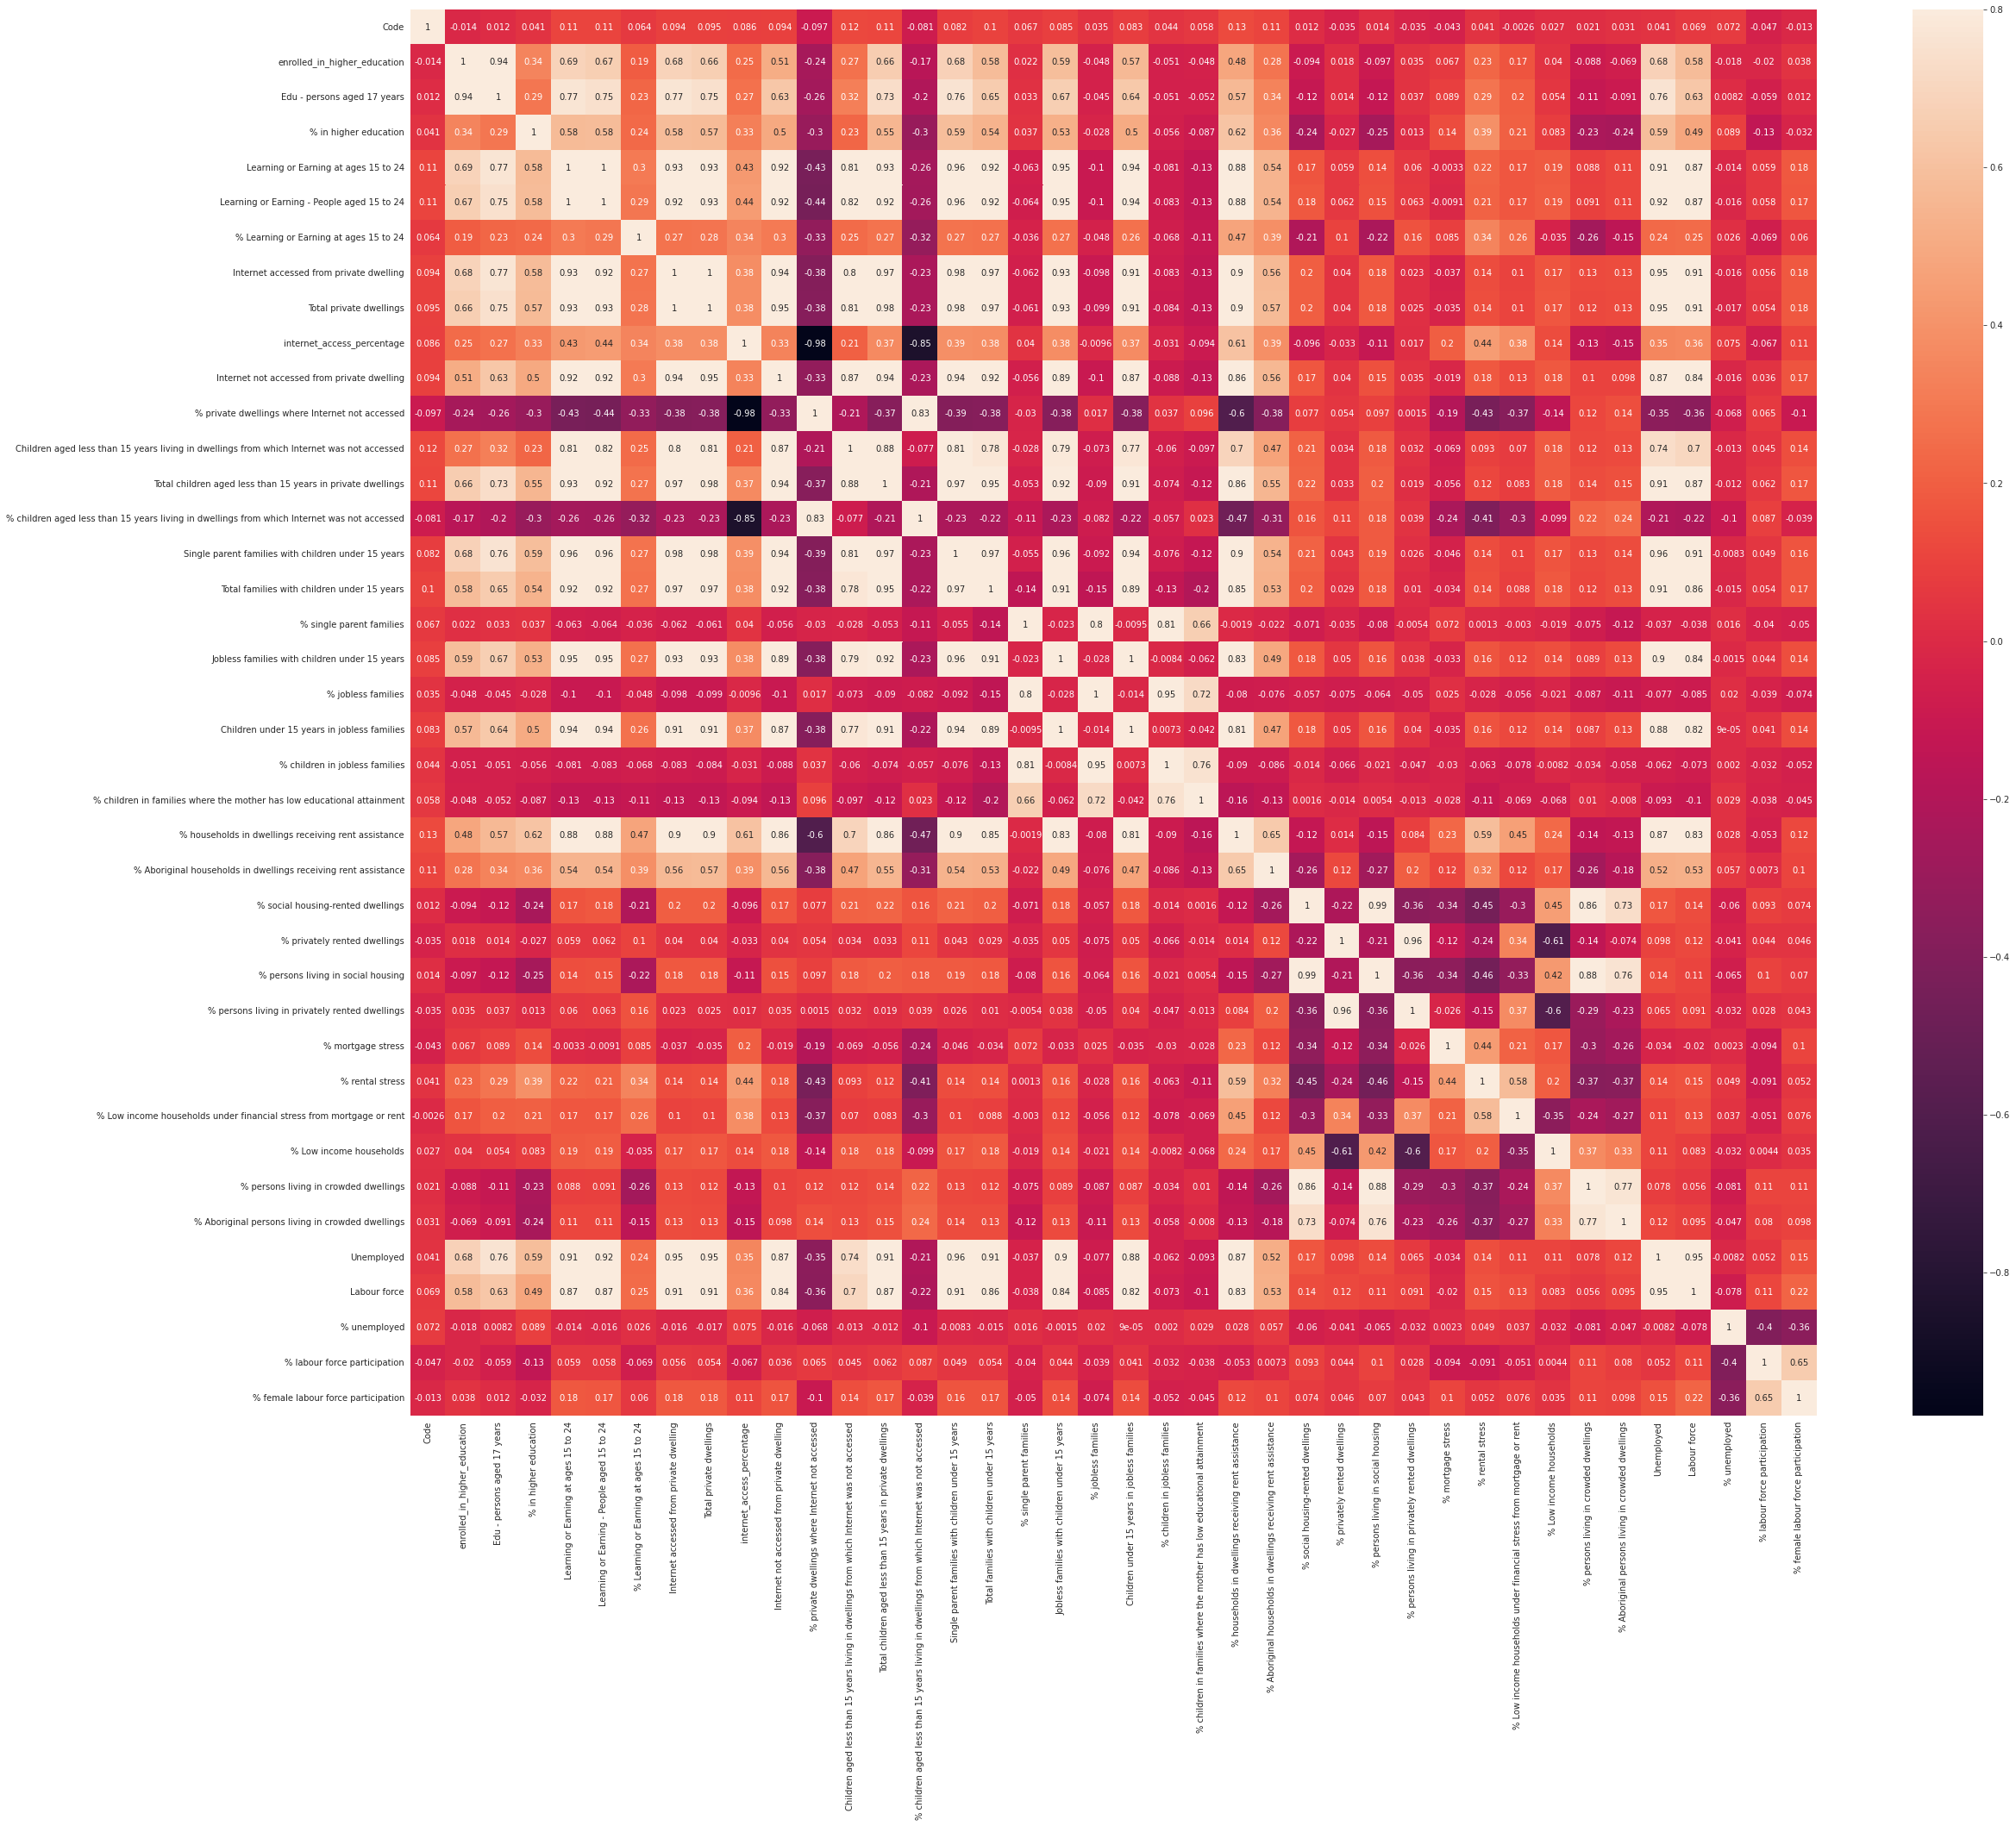

In [37]:
# visualizing the correlation matrix
# here we are using the function corr() to get the correlation values
corr = df_phidu.corr()
fig = plt.figure(figsize=(40,30))
sns.heatmap(corr, vmax=.8, square=True,annot=True)

#### Filtering the correlation matrix

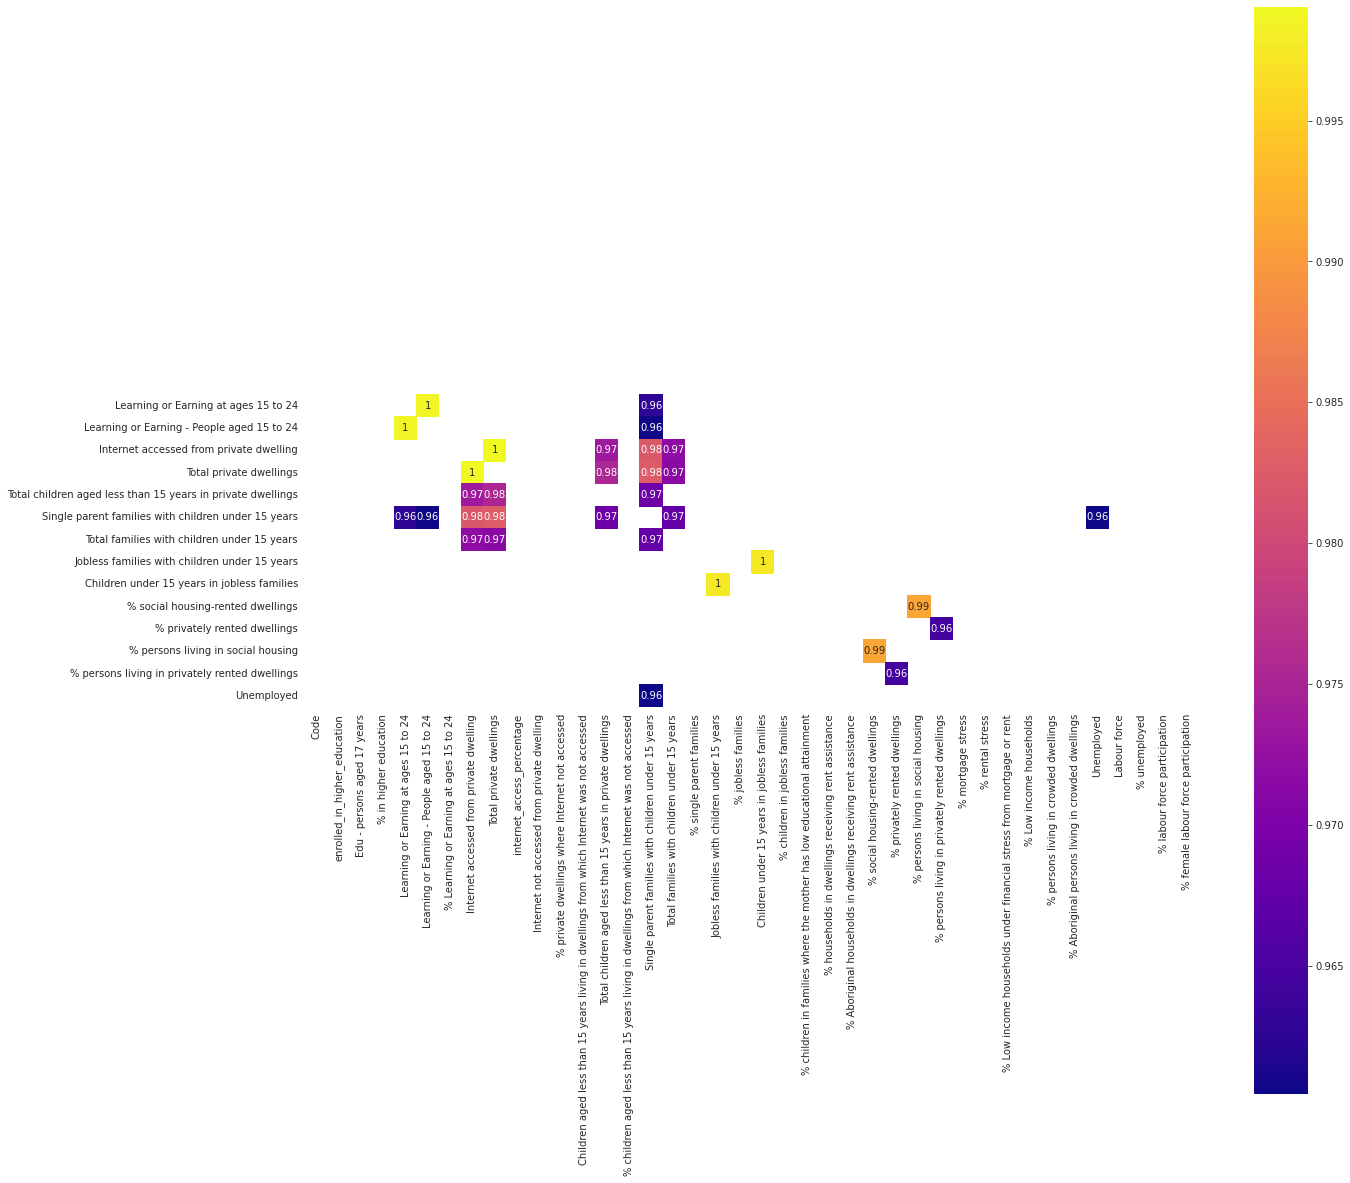

In [38]:
# Filter the correlation plot where the correlation values are greater than 0.96
filterd_corr = corr[(corr >= .96) & (corr != 1)]
filterd_corr = filterd_corr.dropna(how='all')

# plotting the selected correlations
plt.figure(figsize=(20,20))
sns.heatmap(filterd_corr, cmap='plasma', square=True, annot_kws={"size": 10}, annot=True, cbar=True)

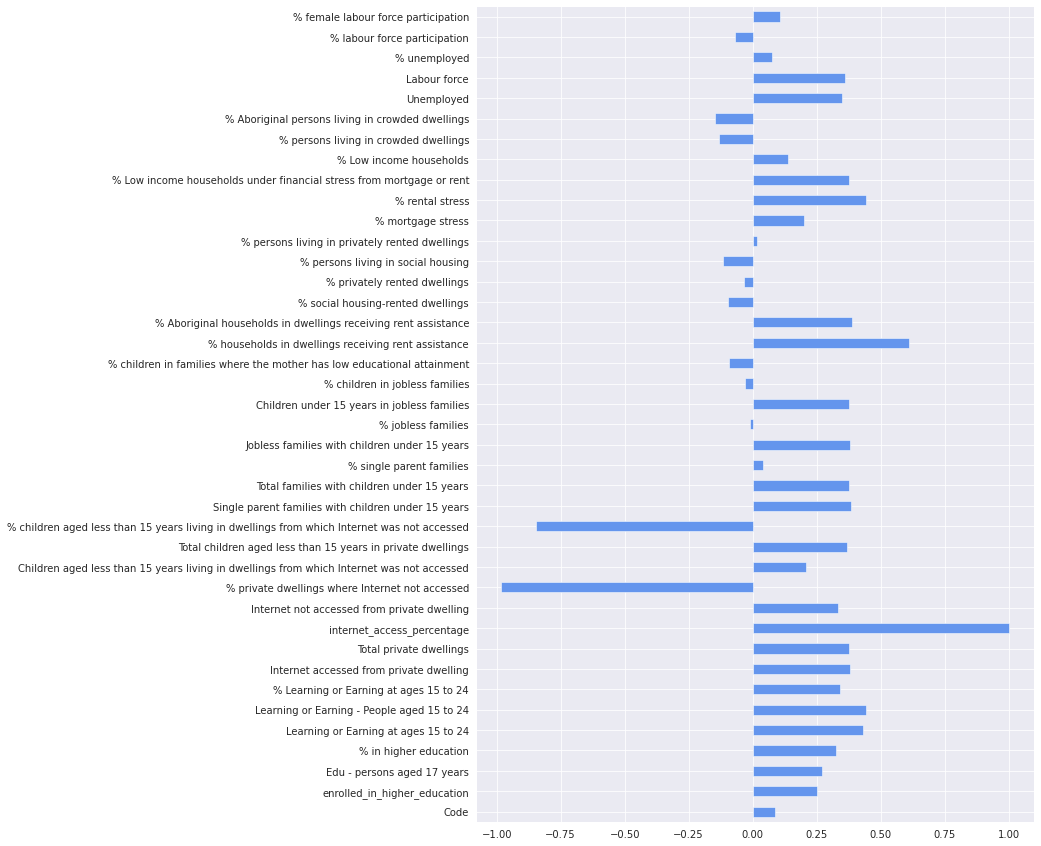

In [39]:
# The following plot visualises the correlation between the attributes
sns.set_style('darkgrid')
plt.figure(figsize=(10,15))
df_phidu.corr()['internet_access_percentage'].plot(kind='barh', fontsize=10, color='cornflowerblue');

## T-SNE Visualization

So far we have used hist() or a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously. But, when the dimensionality of the dataset is large, this kind of visual analysis is insufficient.

This is when we move into dimensional reduction techniques, T-SNE and UMAP.

Evaluate dimentionality reduction with following target variables:
* internet_access %
* %s of households receiving rent assistance
* %s of learning earning
* %s of low income households
* %s of single parent families

In [40]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE

In [41]:
# Data preparation for TSNE visualization

# Duplicate of the original dataframe dropping the NaNs
df_phidu_new = df_phidu.copy()
df_phidu_new.replace([np.inf, -np.inf], np.nan, inplace=True)
df_phidu_new = df_phidu_new.dropna()

#Remove Target variables
# Duplicate the original dataframe without the target variables and dropping nan values
data_targ = df_phidu_new.copy()
data_targ.drop(['internet_access_percentage',
                '% households in dwellings receiving rent assistance',
                '% Learning or Earning at ages 15 to 24',
                '% Low income households',
                '% single parent families'],axis=1,inplace=True)
data_targ = data_targ.iloc[:, 4:] #remove categorical variables

In [42]:
# Converting the quantitative Target attributes to categorical variables
# Binning the quantitative attributes to five different intervals and assigning them to dataframe columns
cut_value = pd.cut(df_phidu_new['internet_access_percentage'],5).values
df_phidu_new['internet_access_category'] = cut_value

# Categorize the % households receiving rent assistance to 5 categories
cut_value = pd.cut(df_phidu_new['% households in dwellings receiving rent assistance'],5).values
df_phidu_new['%_households_receiving_rent_assistance'] = cut_value

# Categorize the Learning or Earning % to 5 categories
cut_value = pd.cut(df_phidu_new['% Learning or Earning at ages 15 to 24'],5).values
df_phidu_new['%_learning_earning_category'] = cut_value

# Categorize the % of single parent families to 5 categories
cut_value = pd.cut(df_phidu_new['% Low income households'],5).values
df_phidu_new['%_Low_income_households'] = cut_value

# Categorize the % of single parent families to 5 categories
cut_value = pd.cut(df_phidu_new['% single parent families'],5).values
df_phidu_new['%_single_parent_families'] = cut_value

In [43]:
# T-SNE 
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(data_targ)

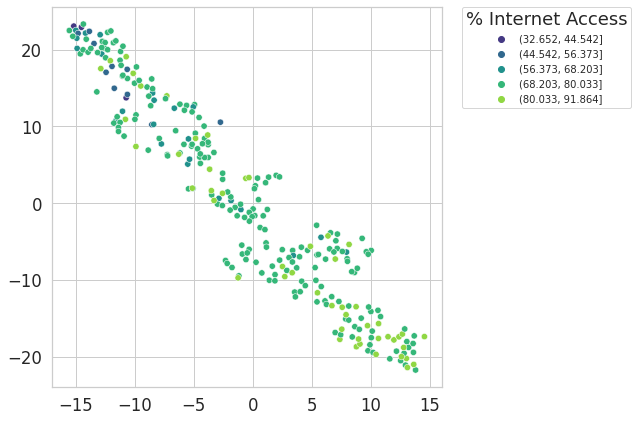

In [44]:
# Visualising T-SNE with internet_access %
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
scatter = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=df_phidu_new['internet_access_category'],s=40,palette='viridis');
scatter.legend(title="% Internet Access", fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

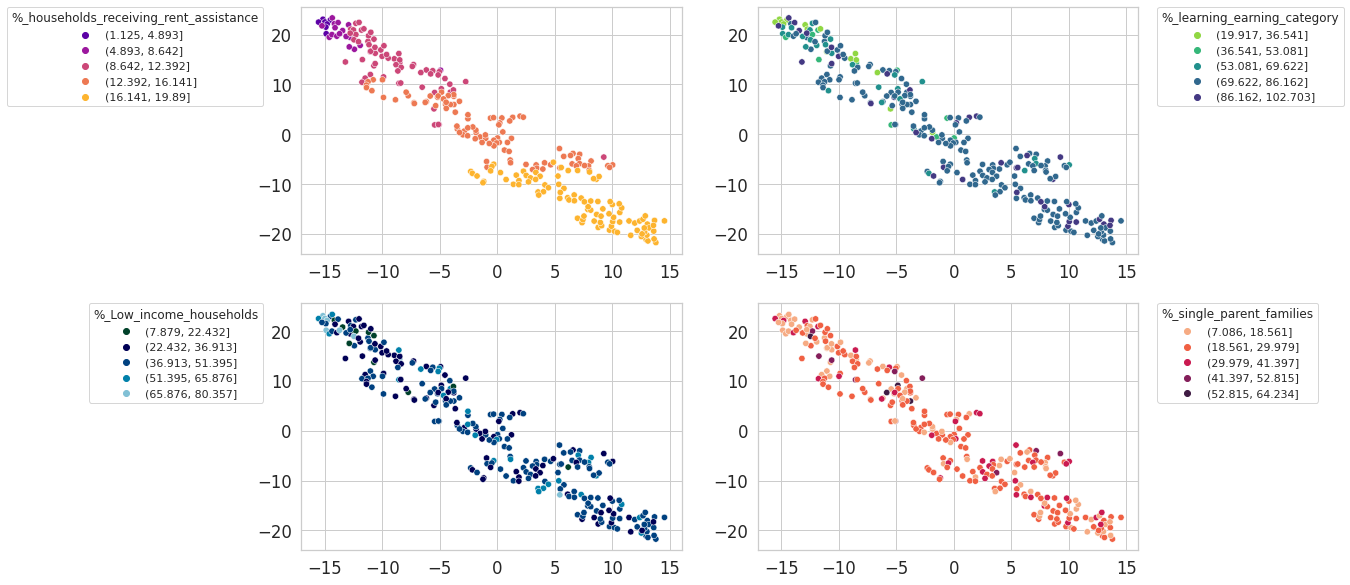

In [45]:
# Visualising T-SNE with other 4 target variables
# Analysing the significantly positively correlated or negatively correlated attributes in the T-SNE visualisation
variables = ['%_households_receiving_rent_assistance', '%_learning_earning_category' ,'%_Low_income_households', '%_single_parent_families']
n_row = 2
n_col = 2

fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15,10))
sns.set(font_scale=1)
sns.set_style("whitegrid")
palette_list = ['plasma', 'viridis_r', 'ocean', 'rocket_r']
count = 0
for i in enumerate(variables):
  qq = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],ax=axes[i[0]//n_row,i[0]%n_col],hue=df_phidu_new[i[1]],s=40, palette=palette_list[count])
  if count == 0 or count == 2:
    qq.legend(bbox_to_anchor=(-0.1, 1), loc=1, borderaxespad=0.).set_title(i[1]);
  if count == 1 or count == 3:
    qq.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title(i[1]);
  count = count + 1


From *subplot 1*, we can deduce that %s of households receiving rent assistance can be clustered accurately from the attributes of the data set.

The rest of the variables,
- %s of learning earning 
- %s of low income households
- %s of single parent families

cannot be accurately described from the rest of the variables in the data set.

Even though there is a clear separation in %s of households receiving rent, different regions distances are not high. UMAP should be able to handle this. Let's check that next




<br>

## UMAP

*Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.* ([Reference](https://umap-learn.readthedocs.io/en/latest/))

The main difference is where t-SNE preserves local structure in the data while UMAP claims to preserve both local and most of the global structure in the data.

This means with t-SNE you cannot interpret the distance between by their proximity in the map. But within a cluster, you can say that points close to each other are more similar than points which points are at different ends. Whereas with UMAP you can do both.

In [46]:
# Install and import libraries for UMAP visualisation
!pip uninstall umap # Have to uninstall umap if installed only
!pip install umap-learn
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2388b081cbf1f34282f15d3eea3400847ee5dfc83f5a578ef78f9e54220ff1b2
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=46019fb637d7da5df9bf2e04d6af848244f52ca03b0ae413eb4077eb2527d268
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [47]:
# UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_targ)
embedding.shape

(279, 2)

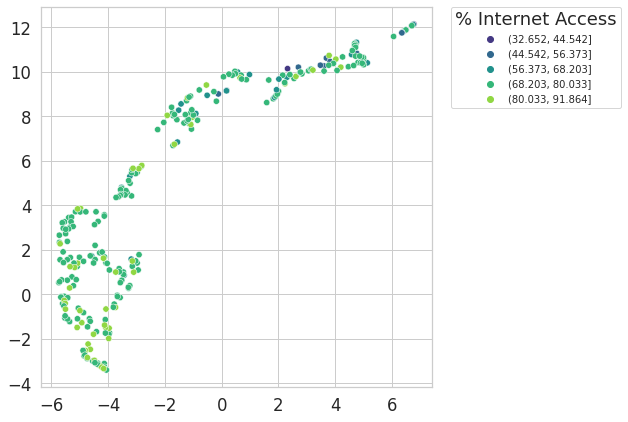

In [48]:
# Visualising T-SNE with internet_access %
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
scatter = sns.scatterplot(x=embedding[:, 0],y=embedding[:, 1],\
                     hue=df_phidu_new['internet_access_category'],s=40,palette='viridis');
scatter.legend(title="% Internet Access", fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

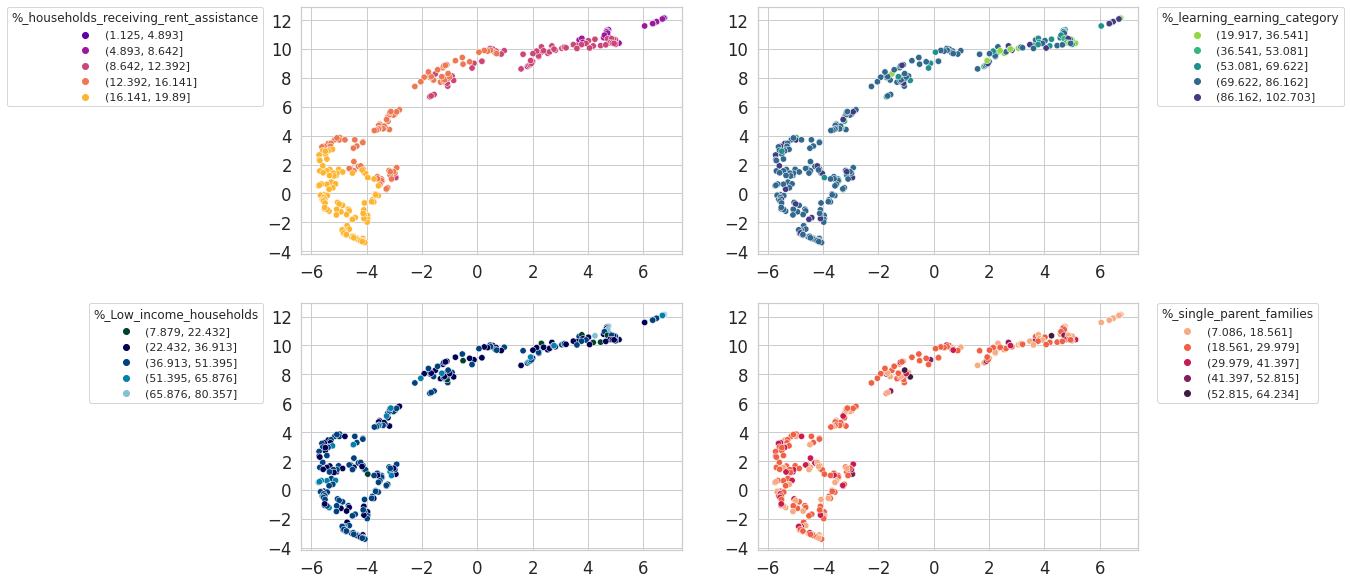

In [49]:
# Visualising UMAP with other 4 target variables
# Analysing the significantly positively correlated or negatively correlated attributes in the T-SNE visualisation
variables = ['%_households_receiving_rent_assistance', '%_learning_earning_category' ,'%_Low_income_households', '%_single_parent_families']
n_row = 2
n_col = 2

fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15,10))
sns.set(font_scale=1)
sns.set_style("whitegrid")
palette_list = ['plasma', 'viridis_r', 'ocean', 'rocket_r']
count = 0
for i in enumerate(variables):
  qq = sns.scatterplot(x=embedding[:,0],y=embedding[:,1],ax=axes[i[0]//n_row,i[0]%n_col],hue=df_phidu_new[i[1]],s=40, palette=palette_list[count])
  if count == 0 or count == 2:
    qq.legend(bbox_to_anchor=(-0.1, 1), loc=1, borderaxespad=0.).set_title(i[1]);
  if count == 1 or count == 3:
    qq.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title(i[1]);
  count = count + 1

From the UMAP visualization, it is evident that %s of internet access categories can be clustered and described accurately from the attributes of the data set and there is clear separation compared to the T-SNE dimensionality reduction.